<a href="https://colab.research.google.com/github/swarnygora/final-project/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file name
dataset_path = 'acquiredDataset.csv'

try:
    df = pd.read_csv(dataset_path,
                     encoding='utf-8',  # Adjust encoding if needed
                     sep=',',           # Adjust delimiter if needed
                     header=0,           # Adjust header row if needed
                     on_bad_lines='skip') # or error_bad_lines=False, if available
    print(df.head())

except UnicodeDecodeError:
    print("UnicodeDecodeError: Try a different encoding (e.g., 'latin-1', 'cp1252').")
except pd.errors.ParserError:
    print("ParserError: Check the delimiter (sep argument) and data structure.")
except FileNotFoundError:
    print("FileNotFoundError: Make sure 'your_dataset.csv' is in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  


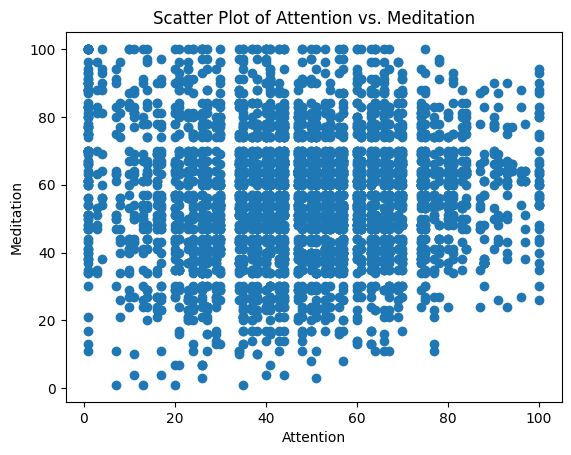

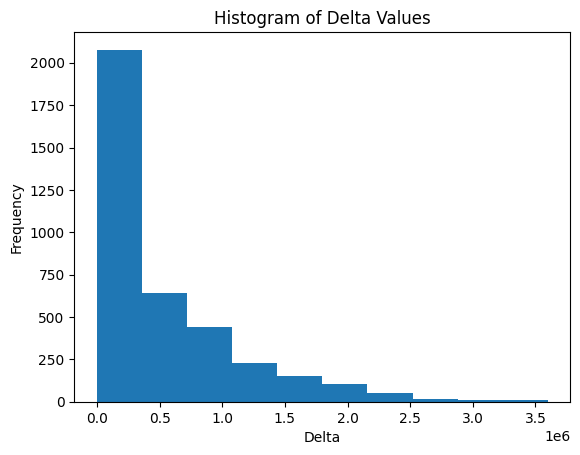

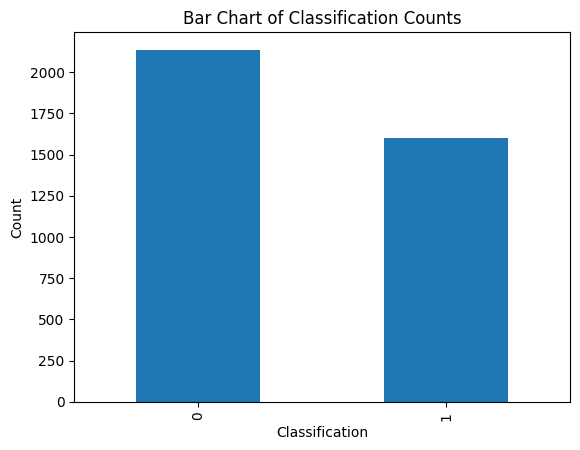

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is loaded into a pandas DataFrame called 'df'

# Example 1: Scatter plot of attention vs. meditation
plt.scatter(df['attention'], df['meditation'])
plt.xlabel('Attention')
plt.ylabel('Meditation')
plt.title('Scatter Plot of Attention vs. Meditation')
plt.show()

# Example 2: Histogram of delta values
plt.hist(df['delta'], bins=10)
plt.xlabel('Delta')
plt.ylabel('Frequency')
plt.title('Histogram of Delta Values')
plt.show()

# Example 3: Bar chart of classification counts
classification_counts = df['classification'].value_counts()
classification_counts.plot(kind='bar')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Bar Chart of Classification Counts')
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your dataset is loaded into a pandas DataFrame called 'df'
# Replace 'encoding', 'delimiter', 'special_chars', and 'import_success'
# with the actual column names in your dataset, if different

# Select features and target variable
X = df[['attention', 'meditation', 'delta']]
y = df['classification']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ... (further analysis and interpretation)

Accuracy: 0.6398929049531459


In [19]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the EEG sleep dataset
data = pd.read_csv('acquiredDataset.csv')  # <-- replace with your filename

# Inspect the data
print(data.head())

# Separate features and labels
X = data.drop('classification', axis=1)  # Features (EEG signals)
y = data['classification']               # Labels (sleep stages)

# Encode labels if they are not numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  
Accuracy: 0.784471218206158
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       438
           1       0.76      0.70      0.73       309

    accuracy                           0.78       747
   